# [NA] MNIST classification with autoencoder

## Basic classification task with simple autoencoder

In [11]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
import sys
sys.path.append('D:/Wisdom/workspace_python/research/model/')
import keras_models

In [2]:
mnist=input_data.read_data_sets("../dataset/MNIST_data/",one_hot=True)
print(mnist.train.num_examples)
print(mnist.validation.num_examples)
print(mnist.test.num_examples)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../dataset/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../dataset/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ../dataset/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../dataset/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
55000
5000
10000


In [3]:
# parameter and hyperparameter setting
pixel=28
image_size=pixel*pixel
n_class=10
n_hidden=200
n_latent=50

lr=0.001
training_epochs=15
batch_size=100
total_batch=int(mnist.train.num_examples/batch_size)
print(total_batch)

display_step=1
example_to_show=10

550


In [4]:
tf.reset_default_graph()

In [5]:
# autoencoder part
def weight_variable(shape):
#     return tf.Variable(tf.random_normal(shape=shape))
    return tf.Variable(tf.truncated_normal(shape=shape,stddev=0.1))

def bias_variable(shape):
#     return tf.Variable(tf.random_normal(shape=shape))
    return tf.Variable(tf.constant(shape=shape,value=0.1))

def fc_layer(inputs,n_outputs,activation_fn=tf.nn.relu,keep_prob=1):
    n_inputs=int(inputs.shape[1])
    W_fc=weight_variable([n_inputs,n_outputs])
    b_fc=bias_variable([n_outputs])
    logit_fc=tf.matmul(inputs,W_fc)+b_fc
    _a_fc=activation_fn(logit_fc)
    a_fc=tf.nn.dropout(_a_fc,keep_prob=keep_prob)
    return a_fc, logit_fc


In [6]:
x=tf.placeholder('float32',[None,image_size])
y_=tf.placeholder('float32',[None,n_class])

a1,_=fc_layer(x,n_hidden,activation_fn=tf.nn.sigmoid,keep_prob=1)
a2,_=fc_layer(a1,n_latent,activation_fn=tf.nn.sigmoid,keep_prob=1)
a3,_=fc_layer(a2,n_hidden,activation_fn=tf.nn.sigmoid,keep_prob=1)
a4,_=fc_layer(a3,image_size,activation_fn=tf.nn.sigmoid,keep_prob=1)

# W1=tf.Variable(tf.random_normal([image_size,n_hidden]))
# W2=tf.Variable(tf.random_normal([n_hidden,n_latent]))
# W3=tf.Variable(tf.random_normal([n_latent,n_hidden]))
# W4=tf.Variable(tf.random_normal([n_hidden,image_size]))
# b1=tf.Variable(tf.random_normal([n_hidden]))
# b2=tf.Variable(tf.random_normal([n_latent]))
# b3=tf.Variable(tf.random_normal([n_hidden]))
# b4=tf.Variable(tf.random_normal([image_size]))
# a1=tf.nn.sigmoid(tf.matmul(x,W1)+b1)
# a2=tf.nn.sigmoid(tf.matmul(a1,W2)+b2)
# a3=tf.nn.sigmoid(tf.matmul(a2,W3)+b3)
# a4=tf.nn.sigmoid(tf.matmul(a3,W4)+b4)


cost_autoencoder=tf.reduce_mean(tf.squared_difference(x,a4))
optimizer_autoencoder=tf.train.AdamOptimizer(learning_rate=lr).minimize(cost_autoencoder)

# softmax classifier part
# y=fc_layer(a2,10)
Wc1=tf.Variable(tf.random_normal([n_latent,10]))
bc1=tf.Variable(tf.random_normal([10]))
y=tf.matmul(a2,Wc1)+bc1
cost_classifier=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_,logits=y))
optimizer_classifier=tf.train.AdamOptimizer(learning_rate=lr).minimize(cost_classifier)

# Fine tuning optimization
cost_total=cost_autoencoder+cost_classifier
optimizer_total=tf.train.AdamOptimizer(learning_rate=lr).minimize(cost_total)
print(cost_total)
print(optimizer_total)


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Tensor("add_5:0", shape=(), dtype=float32)
name: "Adam_2"
op: "NoOp"
input: "^Adam_2/update_Variable/ApplyAdam"
input: "^Adam_2/update_Variable_1/ApplyAdam"
input: "^Adam_2/update_Variable_2/ApplyAdam"
input: "^Adam_2/update_Variable_3/ApplyAdam"
input: "^Adam_2/update_Variable_4/ApplyAdam"
input: "^Adam_2/update_Variable_5/ApplyAdam"
input: "^Adam_2/update_Variable_6/ApplyAdam"
input: "^Adam_2/update_Variable_7/ApplyAdam"
input: "^Adam_2/update_Variable_8/ApplyAdam"
input: "^Adam_2/update_Variable_9/ApplyAdam"
input: "^Adam_2/Assign"
input: "^Adam_2/Assign_1"



In [7]:
total_batch

550

In [8]:
sess=tf.Session()
init=tf.global_variables_initializer()
sess.run(init)
train_cost_list=[]
test_cost_list=[]

for epoch in range(training_epochs):
    avg_cost=0.
    for step in range(total_batch):
        batch_xs,batch_ys=mnist.train.next_batch(batch_size)
        _,cost_value=sess.run([optimizer_autoencoder,cost_autoencoder],feed_dict={x:batch_xs})
        avg_cost+=cost_value
    train_cost_list.append(avg_cost/total_batch)
    test_cost_list.append(sess.run(cost_autoencoder,feed_dict={x:mnist.test.images}))
    if epoch % display_step ==0:
        print("Epoch: ", '%04d' %(epoch+1), "cost=","{:.9f}".format(cost_value))
print("Autoencoder pre-training optimization finished.")


Epoch:  0001 cost= 0.045875870
Epoch:  0002 cost= 0.036276035
Epoch:  0003 cost= 0.029373029
Epoch:  0004 cost= 0.025005318
Epoch:  0005 cost= 0.021167750
Epoch:  0006 cost= 0.020097448
Epoch:  0007 cost= 0.016877588
Epoch:  0008 cost= 0.016187157
Epoch:  0009 cost= 0.015052418
Epoch:  0010 cost= 0.014025374
Epoch:  0011 cost= 0.012001353
Epoch:  0012 cost= 0.011880728
Epoch:  0013 cost= 0.012969426
Epoch:  0014 cost= 0.012158904
Epoch:  0015 cost= 0.011076144
Autoencoder pre-training optimization finished.


D:\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


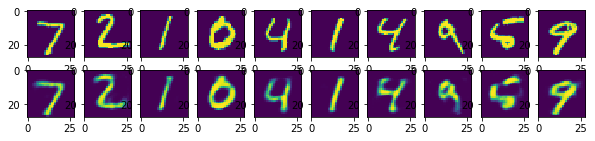

In [9]:
x_reconstructed=sess.run(a4,feed_dict={x:mnist.test.images[:example_to_show]})
f,a=plt.subplots(2,10,figsize=(10,2))
for i in range(example_to_show):
    a[0][i].imshow(np.reshape(mnist.test.images[i],(pixel,pixel)))
    a[1][i].imshow(np.reshape(x_reconstructed[i],(pixel,pixel)))
f.show()
plt.draw()
plt.show()

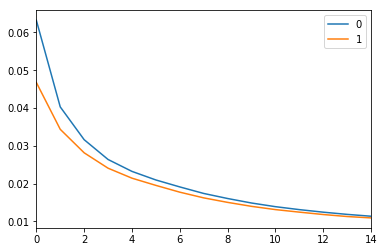

In [18]:
cost_list=pd.DataFrame([train_cost_list,test_cost_list])
a=cost_list.transpose()
a.plot()

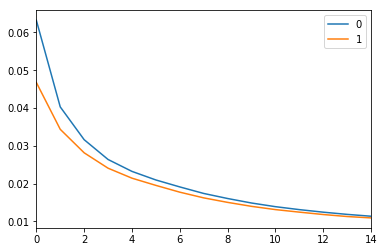

In [10]:
plt.close()
# training softmax classificer with latent features
avg_cost_list=[]

for epoch in range(training_epochs):
    avg_cost=0.
    for step in range(total_batch):
        batch_xs,batch_ys=mnist.train.next_batch(batch_size)
        _,cost_value=sess.run([optimizer_classifier,cost_classifier],
                              feed_dict={x:batch_xs,y_:batch_ys})
    if epoch % display_step ==0:
        print("Epoch: ", '%04d' %(epoch+1), "cost=","{:.9f}".format(cost_value))
print("Classifier optimization finished.")

Epoch:  0001 cost= 0.224019706
Epoch:  0002 cost= 0.094335817
Epoch:  0003 cost= 0.162616387
Epoch:  0004 cost= 0.128618419
Epoch:  0005 cost= 0.047837898
Epoch:  0006 cost= 0.060543261
Epoch:  0007 cost= 0.099329770
Epoch:  0008 cost= 0.073805630
Epoch:  0009 cost= 0.038858224
Epoch:  0010 cost= 0.027226072
Epoch:  0011 cost= 0.016398299
Epoch:  0012 cost= 0.035922479
Epoch:  0013 cost= 0.039171714
Epoch:  0014 cost= 0.012315679
Epoch:  0015 cost= 0.012558797
Classifier optimization finished.


In [11]:
correct_prediction=tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,dtype='float32'))
ac=sess.run(accuracy,feed_dict={x:mnist.test.images,y_:mnist.test.labels})
print('Accuracy (before fine-tuning): '+str(ac*100)+'%')

Accuracy (before fine-tuning): 97.93999791145325%


In [12]:
# fine-tuning softmax model
avg_cost_list=[]

for epoch in range(training_epochs):
    avg_cost=0.
    for step in range(total_batch):
        batch_xs,batch_ys=mnist.train.next_batch(batch_size)
        _,cost_value=sess.run([optimizer_total,cost_total],
                              feed_dict={x:batch_xs,y_:batch_ys})
    if epoch % display_step ==0:
        print("Epoch: ", '%04d' %(epoch+1), "cost=","{:.9f}".format(cost_value))
print("Fine-tuning softmax model optimization finished.")

Epoch:  0001 cost= 0.060781434
Epoch:  0002 cost= 0.033292487
Epoch:  0003 cost= 0.026264925
Epoch:  0004 cost= 0.044873111
Epoch:  0005 cost= 0.053562589
Epoch:  0006 cost= 0.028308801
Epoch:  0007 cost= 0.028287996
Epoch:  0008 cost= 0.021506064
Epoch:  0009 cost= 0.018515436
Epoch:  0010 cost= 0.019438878
Epoch:  0011 cost= 0.022516564
Epoch:  0012 cost= 0.023160517
Epoch:  0013 cost= 0.019391689
Epoch:  0014 cost= 0.016047213
Epoch:  0015 cost= 0.014641181
Fine-tuning softmax model optimization finished.


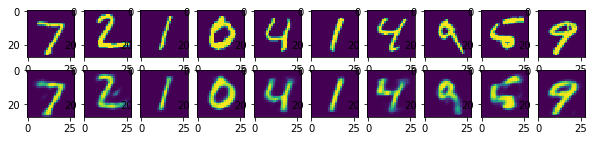

In [13]:
x_reconstructed=sess.run(a4,feed_dict={x:mnist.test.images[:example_to_show]})
f,a=plt.subplots(2,10,figsize=(10,2))
for i in range(example_to_show):
    a[0][i].imshow(np.reshape(mnist.test.images[i],(pixel,pixel)))
    a[1][i].imshow(np.reshape(x_reconstructed[i],(pixel,pixel)))
f.show()
plt.draw()
plt.show()

In [14]:
ac=sess.run(accuracy,feed_dict={x:mnist.test.images,y_:mnist.test.labels})
print('Accuracy (before fine-tuning): '+str(ac*100)+'%')
# is there significant change in accuracy? 
# why? maybe small learning rate? or network modeling?

Accuracy (before fine-tuning): 98.089998960495%


In [15]:
tf.reset_default_graph()
sess.close()

In [8]:
mnist = input_data.read_data_sets('../data/MNIST_data', one_hot=True)
x_train, _ = mnist.train.images, mnist.train.labels
x_test = mnist.test.images

Extracting ../data/MNIST_data\train-images-idx3-ubyte.gz
Extracting ../data/MNIST_data\train-labels-idx1-ubyte.gz
Extracting ../data/MNIST_data\t10k-images-idx3-ubyte.gz
Extracting ../data/MNIST_data\t10k-labels-idx1-ubyte.gz


In [44]:
input_shape=(784,)

inputs=tf.keras.layers.Input(shape=input_shape,name='encoder_input')
x=inputs
x = tf.keras.layers.Dense(64, activation='relu')(x)
z=tf.keras.layers.Dense(32,activation='relu',name='latent_vector')(x)
encoder=tf.keras.models.Model(inputs,z,name='encoder')

z_inputs=tf.keras.layers.Input(shape=(32,),name='decoder_input')
x = tf.keras.layers.Dense(64, activation='relu')(z_inputs)
outputs = tf.keras.layers.Dense(784, activation='sigmoid')(x)
decoder=tf.keras.models.Model(z_inputs,outputs,name='decoder')

autoencoder=tf.keras.models.Model(inputs,decoder(encoder(inputs)),name='autoencoder')
autoencoder.compile(loss='mse',optimizer='adam')

autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Train on 55000 samples, validate on 10000 samples
Epoch 1/20
55000/55000 [==============================] - 4s 76us/step - loss: 0.0718 - val_loss: 0.0421
Epoch 2/20
55000/55000 [==============================] - 3s 52us/step - loss: 0.0356 - val_loss: 0.0294
Epoch 3/20
55000/55000 [==============================] - 3s 62us/step - loss: 0.0263 - val_loss: 0.0230
Epoch 4/20
55000/55000 [==============================] - 3s 49us/step - loss: 0.0221 - val_loss: 0.0203
Epoch 5/20
55000/55000 [==============================] - 3s 48us/step - loss: 0.0199 - val_loss: 0.0184
Epoch 6/20
55000/55000 [==============================] - 3s 61us/step - loss: 0.0181 - val_loss: 0.0169
Epoch 7/20
55000/55000 [==============================] - 3s 48us/step - loss: 0.0170 - val_loss: 0.0161
Epoch 8/20
55000/55000 [==============================] - 3s 50us/step - loss: 0.0163 - val_loss: 0.0155
Epoch 9/20
55000/55000 [==============================] - 3s 58us/step - loss: 0.0158 - val_loss: 0.0150
Epoch

In [51]:
f=autoencoder.predict(x_test[0:1])
# with open('C:/Users/csjeong/Desktop/predicted_mnist.txt','w') as b:
#     for a in f[0]:
#         b.writelines(str(a)+'\n')
with open('C:/Users/csjeong/Desktop/original_mnist.txt','w') as b:
    for a in x_test[0]:
        b.writelines(str(a)+'\n')
    



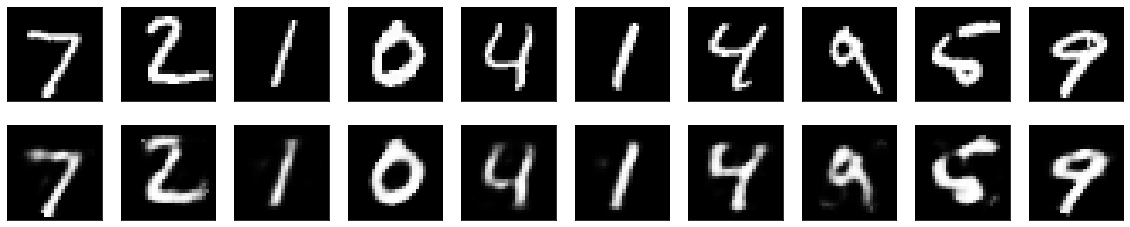

In [45]:

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [27]:
autoencoder.save('test.hdf5')

784

In [109]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_curve

class MyKeras(tf.keras.Model):
    def __init__(self, inputs, outputs,**kw):
        super(MyKeras, self).__init__(inputs, outputs,**kw)

    def fit(self, **kw):
        self.hist = super(MyKeras, self).fit(**kw)

    def get_info(self):
        print('------------------------ GET Model Info. ------------------------')
        print('Current class and base class(es):\t')
        class_list = []
        for base in self.__class__.mro():
            class_list.append(base.__name__)
        print(' < '.join(class_list))
        print('\nSummary my model:')
        self.summary()

    def plot_epoch_acc_loss(self):
        fig, loss_ax = plt.subplots()
        acc_ax = loss_ax.twinx()
        loss_ax.plot(self.hist.history['loss'], 'y', label='train loss')
        loss_ax.plot(self.hist.history['val_loss'], 'r', label='val loss')
        loss_ax.set_xlabel('epoch')
        loss_ax.set_ylabel('loss')
        loss_ax.legend(loc='lower left', fancybox=True)

        acc_ax.plot(self.hist.history['acc'], 'b', label='train acc')
        acc_ax.plot(self.hist.history['val_acc'], 'g', label='val acc')
        acc_ax.set_ylabel('accuracy')
        acc_ax.legend(loc='upper left', fancybox=True)
        plt.show()

    def plot_roc_curve(self,test_x,test_y):
        y_test=[]
        for v in test_y:
            y_test.append(list(v).index(1))
        y_pred = self.predict(test_x)[:, 1]
        fpr, tpr, threshold = roc_curve(y_test, y_pred, pos_label=1)
        roc_auc = auc(fpr, tpr)
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange',
                 lw=3, label='ROC curve (AUROC = %0.2f)' % roc_auc)

        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic curve')
        plt.legend(loc="lower right")
        plt.show()

class LinearClassifier(MyKeras):
    def __init__(self, inputs, optimizer=tf.keras.optimizers.Adam()):
        outputs = tf.keras.layers.Dense(2, activation=tf.keras.activations.linear)(inputs)
        super(LinearClassifier, self).__init__(inputs, outputs)
        self.optimizer = optimizer
        super(LinearClassifier, self).compile(loss=tf.keras.losses.categorical_crossentropy,
                                                optimizer=self.optimizer, metrics=['accuracy'])

class LogisticRegression(MyKeras):
    def __init__(self, inputs, optimizer=tf.keras.optimizers.Adam()):
        outputs = tf.keras.layers.Dense(2, activation=tf.nn.softmax)(inputs)
        super(LogisticRegression, self).__init__(inputs, outputs)
        self.optimizer = optimizer
        super(LogisticRegression, self).compile(loss=tf.keras.losses.categorical_crossentropy,
                                                optimizer=self.optimizer, metrics=['accuracy'])


class MultiLayerPerceptron(MyKeras):
    def __init__(self, inputs, optimizer=tf.keras.optimizers.Adam()):
        x = tf.keras.layers.Dense(500, activation=tf.nn.relu)(inputs)
        outputs = tf.keras.layers.Dense(2, activation=tf.nn.softmax)(x)
        super(MultiLayerPerceptron, self).__init__(inputs, outputs)
        self.optimizer = optimizer
        super(MultiLayerPerceptron, self).compile(loss=tf.keras.losses.categorical_crossentropy,
                                                optimizer=self.optimizer, metrics=['accuracy'])



def plot_history(history):

    x= range(1,len(history['val_loss'])+1)

    plt.figure(figsize=(8,12))

    plt.subplot(2,1,1)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(x, history['mean_absolute_error'],
           label='Train Error')
    plt.plot(x, history['val_mean_absolute_error'],
           label = 'Val Error')
    plt.legend()

    plt.subplot(2,1,2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(x, history['mean_squared_error'],
           label='Train Error')
    plt.plot(x, history['val_mean_squared_error'],
           label = 'Val Error')
    plt.legend()
    plt.show()

In [157]:
class AutoEncoder(MyKeras):
    def __init__(self, inputs, optimizer=tf.keras.optimizers.Adam()):
        self.inputs=inputs
        self.encoded = tf.keras.layers.Dense(64, activation='relu')(self.inputs)
        self.z = tf.keras.layers.Dense(32, activation='relu')(self.encoded)
        self.encoder=super(object,self.inputs,self.z)
        
        self.z_inputs=tf.keras.layers.Input(shape=(32,),name='decoder_input')
        self.decoded = tf.keras.layers.Dense(64, activation='relu')(self.z_inputs)
        self.outputs = tf.keras.layers.Dense(int(inputs.shape[1]), activation='sigmoid')(self.decoded)
        self.decoder=super(object,self.z_inputs,self.outputs)
        print(self.encoder)
        print(self.decoder)
#         super(AutoEncoder, self).__init__(self.inputs, self.decoder(self.encoder(self.inputs)))
#         self.optimizer = optimizer
#         super(AutoEncoder, self).compile(loss='mse', optimizer=self.optimizer,
#                                          metrics=['mean_squared_error', 'mean_absolute_error', 'cosine_proximity'])
#     def encoder(self,super):
#         return super(inputs=self.inputs,outputs=self.z)
    
#     def decoder(self,super):
#         return super(inputs=self.z_inputs,outputs=self.outputs)



In [158]:
from tensorflow.keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
encoding_dim=32
input_img=tf.keras.layers.Input(shape=(784,))
int(input_img.shape[1])
autoencoder=AutoEncoder(input_img)
# autoencoder.fit(x=x_train, y=x_train,epochs=50,batch_size=256,shuffle=True,validation_data=(x_test, x_test))


TypeError: super() takes at most 2 arguments (3 given)

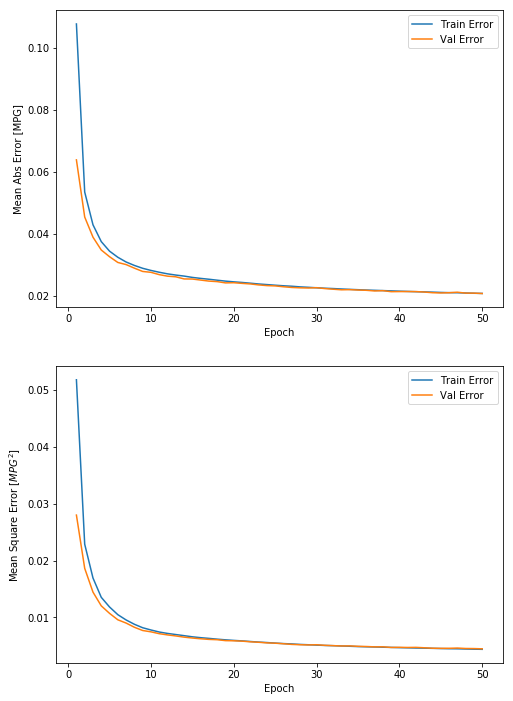

In [42]:
his=autoencoder.hist.history
plot_history(his)

In [56]:
encoding_dim=50
encoder = tf.keras.models.Model(autoencoder.inputs, autoencoder.z)

encoded_input = tf.keras.layers.Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# decoder_layer.get_config()
decoder = tf.keras.models.Model(autoencoder.z, autoencoder.outputs)

# encoded_imgs = encoder.predict(x_test)
# decoded_imgs = decoder.predict(encoded_imgs)
# n = 10  # how many digits we will display
# plt.figure(figsize=(20, 4))
# for i in range(n):
#     # display original
#     ax = plt.subplot(2, n, i + 1)
#     plt.imshow(x_test[i].reshape(28, 28))
#     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)

#     # display reconstruction
#     ax = plt.subplot(2, n, i + 1 + n)
#     plt.imshow(decoded_imgs[i].reshape(28, 28))
#     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)
# plt.show()

AttributeError: 'Model' object has no attribute '_name'